# Dynamic ecoregions

## Define inputs

In [1]:
# Inputs

input_file = "data/data-continental-united-states.csv"
# input_file = "data/data-nh-vt.csv"
geocode_precision = 4
# geocode_precision = 5
log_file = "run.log"
num_clusters = 60
taxon_filter = "Insecta"

## Set up logging

In [2]:
import logging

logging.basicConfig(filename=log_file, encoding="utf-8", level=logging.INFO)

## Data flow

/Users/coreyf/dev/frewsxcv/citizen-science-ecoregions/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


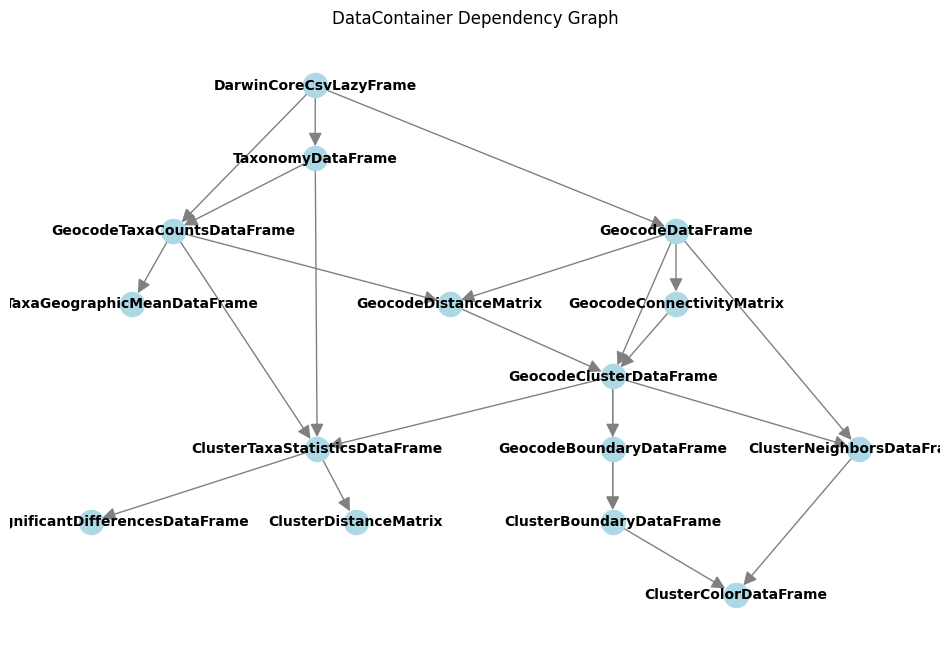

In [3]:
from src.dependency_graph import plot_dependency_graph

plot_dependency_graph()

## `DarwinCoreCsvLazyFrame`

### Build

In [4]:
from src.lazyframes.darwin_core_csv import DarwinCoreCsvLazyFrame

darwin_core_csv_lazy_frame = DarwinCoreCsvLazyFrame.build(input_file, taxon_filter=taxon_filter)

### Preview

In [5]:
darwin_core_csv_lazy_frame.lf.limit(3).collect()

gbifID,datasetKey,occurrenceID,kingdom,phylum,class,order,family,genus,species,infraspecificEpithet,taxonRank,scientificName,verbatimScientificName,verbatimScientificNameAuthorship,countryCode,locality,stateProvince,occurrenceStatus,individualCount,publishingOrgKey,decimalLatitude,decimalLongitude,coordinateUncertaintyInMeters,coordinatePrecision,elevation,elevationAccuracy,depth,depthAccuracy,eventDate,day,month,year,taxonKey,speciesKey,basisOfRecord,institutionCode,collectionCode,catalogNumber,recordNumber,identifiedBy,dateIdentified,license,rightsHolder,recordedBy,typeStatus,establishmentMeans,lastInterpreted,mediaType,issue
str,str,str,enum,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,f64,f64,str,str,str,str,str,str,str,str,str,str,u64,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
"""4424226317""","""50c9509d-22c7-4a22-a47d-8c4842…","""https://www.inaturalist.org/ob…","""Animalia""","""Arthropoda""","""Insecta""","""Odonata""","""Libellulidae""","""Sympetrum""",null,null,"""GENUS""","""Sympetrum Newman, 1833""","""Sympetrum""",null,"""US""",null,"""New York""","""PRESENT""",null,"""28eb1a3f-1c15-4a95-931a-4af90e…",42.96266,-76.740947,"""2191.0""",null,null,null,null,null,"""2019-09-06T10:30""","""6""","""9""","""2019""",1428195,null,"""HUMAN_OBSERVATION""","""iNaturalist""","""Observations""","""32505913""",null,"""Amy Guala""","""2019-09-11T01:33:07""","""CC_BY_NC_4_0""","""Amy Guala""","""Amy Guala""",null,null,"""2024-12-03T00:52:33.467Z""","""StillImage""","""COORDINATE_ROUNDED;CONTINENT_D…"
"""2423028148""","""50c9509d-22c7-4a22-a47d-8c4842…","""https://www.inaturalist.org/ob…","""Animalia""","""Arthropoda""","""Insecta""","""Lepidoptera""","""Geometridae""","""Nematocampa""","""Nematocampa resistaria""",null,"""SPECIES""","""Nematocampa resistaria (Herric…","""Nematocampa resistaria""",null,"""US""",null,"""Vermont""","""PRESENT""",null,"""28eb1a3f-1c15-4a95-931a-4af90e…",43.822608,-72.641412,"""5.0""",null,null,null,null,null,"""2019-09-11T22:08:52""","""11""","""9""","""2019""",1991012,"""1991012""","""HUMAN_OBSERVATION""","""iNaturalist""","""Observations""","""32566956""",null,"""bugguytad""","""2019-09-12T02:25:38""","""CC_BY_NC_4_0""","""bugguytad""","""bugguytad""",null,null,"""2024-12-03T01:38:46.617Z""","""StillImage;StillImage;StillIma…","""COORDINATE_ROUNDED;CONTINENT_D…"
"""2423041120""","""50c9509d-22c7-4a22-a47d-8c4842…","""https://www.inaturalist.org/ob…","""Animalia""","""Arthropoda""","""Insecta""","""Odonata""","""Coenagrionidae""","""Argia""","""Argia moesta""",null,"""SPECIES""","""Argia moesta (Hagen, 1861)""","""Argia moesta""",null,"""US""",null,"""Texas""","""PRESENT""",null,"""28eb1a3f-1c15-4a95-931a-4af90e…",30.99463,-103.662658,null,null,null,null,null,null,"""2019-09-08T09:01""","""8""","""9""","""2019""",5051399,"""5051399""","""HUMAN_OBSERVATION""","""iNaturalist""","""Observations""","""32612673""",null,"""Todd Fitzgerald""","""2019-09-12T22:11:30""","""CC_BY_NC_4_0""","""Todd Fitzgerald""","""Todd Fitzgerald""",null,null,"""2024-12-03T01:38:10.816Z""","""StillImage""","""COORDINATE_ROUNDED;CONTINENT_D…"


## `GeohashDataFrame`

### Build

In [6]:
from src.dataframes.geocode import GeocodeDataFrame

geocode_dataframe = GeocodeDataFrame.build(
    darwin_core_csv_lazy_frame,
    geocode_precision,
)

### Preview

In [7]:
geocode_dataframe.df

geocode,center,direct_neighbors,direct_and_indirect_neighbors
str,struct[2],list[str],list[str]
"""840e491ffffffff""","{49.369298,-67.913007}","[""840e497ffffffff"", ""840e493ffffffff"", ""840e49bffffffff""]","[""840e497ffffffff"", ""840e493ffffffff"", ""840e49bffffffff""]"
"""840e493ffffffff""","{48.946311,-67.83016}","[""840e49bffffffff"", ""840e491ffffffff"", … ""842b14dffffffff""]","[""840e49bffffffff"", ""840e491ffffffff"", … ""842b14dffffffff""]"
"""840e497ffffffff""","{49.104076,-68.442117}","[""840e491ffffffff"", ""840e4bbffffffff"", … ""840e493ffffffff""]","[""840e491ffffffff"", ""840e4bbffffffff"", … ""840e493ffffffff""]"
"""840e49bffffffff""","{49.208357,-67.299825}","[""840e491ffffffff"", ""840e493ffffffff"", … ""842b327ffffffff""]","[""840e491ffffffff"", ""840e493ffffffff"", … ""842b327ffffffff""]"
"""840e4b1ffffffff""","{49.410776,-69.681628}","[""840e4b7ffffffff"", ""840e4b3ffffffff"", ""840e4bbffffffff""]","[""840e4b7ffffffff"", ""840e4b3ffffffff"", ""840e4bbffffffff""]"
…,…,…,…
"""844da39ffffffff""","{29.518714,-68.472339}",[],"[""844db1bffffffff""]"
"""844db1bffffffff""","{29.95183,-70.105581}",[],"[""844d86dffffffff"", ""842a5b3ffffffff"", ""844da39ffffffff""]"
"""844db61ffffffff""","{31.586253,-71.677466}",[],"[""842acc9ffffffff"", ""844d86dffffffff""]"


## `TaxonomyDataFrame`

### Build

In [8]:
from src.dataframes.taxonomy import TaxonomyDataFrame

taxonomy_dataframe = TaxonomyDataFrame.build(darwin_core_csv_lazy_frame)

### Preview

In [9]:
taxonomy_dataframe.df

taxonId,kingdom,phylum,class,order,family,genus,species,taxonRank,scientificName
u32,enum,str,str,str,str,str,str,str,str
0,"""Animalia""","""Arthropoda""","""Insecta""","""Hemiptera""","""Cercopidae""","""Aeneolamia""",null,"""GENUS""","""Aeneolamia Fennah, 1949"""
1,"""Animalia""","""Arthropoda""","""Insecta""","""Diptera""","""Dolichopodidae""","""Paraclius""","""Paraclius hybridus""","""SPECIES""","""Paraclius hybridus Melander, 1…"
2,"""Animalia""","""Arthropoda""","""Insecta""","""Lepidoptera""","""Crambidae""","""Lamprosema""","""Blepharomastix ranalis""","""SPECIES""","""Blepharomastix ranalis"""
3,"""Animalia""","""Arthropoda""","""Insecta""","""Coleoptera""","""Scarabaeidae""","""Amblonoxia""","""Amblonoxia palpalis""","""SPECIES""","""Amblonoxia palpalis (Horn, 188…"
4,"""Animalia""","""Arthropoda""","""Insecta""","""Orthoptera""","""Trigonidiidae""","""Phyllopalpus""","""Phyllopalpus pulchellus""","""SPECIES""","""Phyllopalpus pulchellus Uhler,…"
…,…,…,…,…,…,…,…,…,…
37926,"""Animalia""","""Arthropoda""","""Insecta""","""Coleoptera""","""Carabidae""","""Carabus""","""Carabus maeander""","""SPECIES""","""Carabus maeander Fischer von W…"
37927,"""Animalia""","""Arthropoda""","""Insecta""","""Hemiptera""","""Psyllidae""","""Purshivora""","""Purshivora pubescens""","""SPECIES""","""Purshivora pubescens (Crawford…"
37928,"""Animalia""","""Arthropoda""","""Insecta""","""Lepidoptera""","""Tortricidae""","""Eucosma""","""Eucosma floridana""","""SPECIES""","""Eucosma floridana Kearfott, 19…"


## `GeohashSpeciesCountsDataFrame`

### Build

In [10]:
from src.dataframes.geocode_taxa_counts import GeocodeTaxaCountsDataFrame

geocode_taxa_counts_dataframe = GeocodeTaxaCountsDataFrame.build(
    darwin_core_csv_lazy_frame,
    geocode_precision,
    taxonomy_dataframe,
)

### Preview

In [11]:
geocode_taxa_counts_dataframe.df

geocode,taxonId,count
str,u32,u32
"""840e491ffffffff""",31125,2
"""840e491ffffffff""",28704,1
"""840e491ffffffff""",7913,1
"""840e491ffffffff""",15496,1
"""840e491ffffffff""",33006,1
…,…,…
"""844da39ffffffff""",30885,1
"""844db1bffffffff""",36697,1
"""844db61ffffffff""",18620,1


## `GeocodeConnectivityMatrix`

### Build

In [12]:
from src.matrices.geocode_connectivity import GeocodeConnectivityMatrix

geocode_connectivity_matrix = GeocodeConnectivityMatrix.build(geocode_dataframe)

### Shape

In [13]:
geocode_connectivity_matrix._connectivity_matrix.shape

(6061, 6061)

### Preview

In [14]:
geocode_connectivity_matrix._connectivity_matrix

array([[0, 1, 1, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 0]])

## `GeocodeDistanceMatrix`

In [15]:
from src.matrices.geocode_distance import GeocodeDistanceMatrix

print(GeocodeDistanceMatrix.__doc__)


    A distance matrix where each column and row is a geocode, and the cell at the intersection of a
    column and row is the similarity (or distance) between the two geocodes. Internally it is stored
    as a condensed distance matrix, which is a one-dimensional array containing the upper triangular
    part of the distance matrix.
    


### Build

In [16]:
geocode_distance_matrix = GeocodeDistanceMatrix.build(
    geocode_taxa_counts_dataframe,
    geocode_dataframe,
)

/Users/coreyf/dev/frewsxcv/citizen-science-ecoregions/.venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


### Shape

In [17]:
geocode_distance_matrix.squareform().shape

(6061, 6061)

### Preview

In [18]:
geocode_distance_matrix.squareform()

array([[0.        , 0.00096933, 0.00103374, ..., 0.00197701, 0.0018917 ,
        0.00216058],
       [0.00096933, 0.        , 0.00198939, ..., 0.00112119, 0.00096344,
        0.00122563],
       [0.00103374, 0.00198939, 0.        , ..., 0.00297983, 0.00290081,
        0.00315233],
       ...,
       [0.00197701, 0.00112119, 0.00297983, ..., 0.        , 0.00045952,
        0.00054488],
       [0.0018917 , 0.00096344, 0.00290081, ..., 0.00045952, 0.        ,
        0.00042243],
       [0.00216058, 0.00122563, 0.00315233, ..., 0.00054488, 0.00042243,
        0.        ]])

## `GeohashClusterDataFrame`

### Build

In [19]:
from src.dataframes.geocode_cluster import GeocodeClusterDataFrame

geocode_cluster_dataframe = GeocodeClusterDataFrame.build(
    geocode_dataframe,
    geocode_distance_matrix,
    geocode_connectivity_matrix,
    num_clusters,
)

### Preview

In [20]:
geocode_cluster_dataframe.df.limit(3)

geocode,cluster
str,u32
"""840e491ffffffff""",4
"""840e493ffffffff""",4
"""840e497ffffffff""",4


In [21]:
# # TMP

# from src.dataframes.geocode_cluster import GeocodeClusterDataFrame
# from sklearn.metrics import silhouette_score

# results = []

# for i in range(2, 200):
#     geocode_cluster_dataframe = GeocodeClusterDataFrame.build(
#         geocode_dataframe,
#         distance_matrix,
#         connectivity_matrix,
#         num_clusters=i,
#     )
#     score = silhouette_score(
#         X=distance_matrix.squareform(),
#         labels=geocode_cluster_dataframe.df["cluster"],
#         metric="precomputed",
#     )
#     print(f"{i}: {score}")
#     results.append((i, score))

# results

## `ClusterNeighborsDataframe`

### Build

In [22]:
from src.dataframes.cluster_neighbors import ClusterNeighborsDataFrame

cluster_neighbors_dataframe = ClusterNeighborsDataFrame.build(
    geocode_dataframe,
    geocode_cluster_dataframe,
)

### Preview

In [23]:
cluster_neighbors_dataframe.df

cluster,direct_neighbors,direct_and_indirect_neighbors
u32,list[u32],list[u32]
0,"[3, 5, … 27]","[3, 5, … 27]"
1,"[8, 18, … 5]","[8, 18, … 5]"
2,"[3, 4, … 31]","[3, 4, … 31]"
3,"[0, 2, … 27]","[0, 2, … 27]"
4,"[2, 7, … 30]","[2, 7, … 30]"
…,…,…
55,[2],[2]
56,[6],[6]
57,"[33, 3, … 28]","[33, 3, … 28]"


## `ClusterTaxaStatisticsDataFrame`

### Build

In [24]:
from src.dataframes.cluster_taxa_statistics import ClusterTaxaStatisticsDataFrame

cluster_taxa_statistics_dataframe = ClusterTaxaStatisticsDataFrame.build(
    geocode_taxa_counts_dataframe,
    geocode_cluster_dataframe,
    taxonomy_dataframe,
)

### Preview

In [25]:
cluster_taxa_statistics_dataframe.df

cluster,taxonId,count,average
u32,u32,u32,f64
null,13401,28,0.000002
null,36591,143,0.000011
null,29252,229,0.000018
null,155,37,0.000003
null,31199,25,0.000002
…,…,…,…
4,6732,5,0.000023
50,2465,13,0.000014
28,22242,577,0.002417


## `ClusterSignificantDifferencesDataFrame`

### Build

In [26]:
from src.dataframes.cluster_significant_differences import (
    ClusterSignificantDifferencesDataFrame,
)

cluster_significant_differences_dataframe = (
    ClusterSignificantDifferencesDataFrame.build(
        cluster_taxa_statistics_dataframe,
    )
)

### Preview

In [27]:
cluster_significant_differences_dataframe.df.limit(3)

cluster,taxonId,percentage_difference
u32,u32,f64
0,37884,312.761725
0,30536,3433.838431
0,21406,15019.934391


## `GeocodeBoundaryDataFrame`

### Build

In [28]:
from src.dataframes.geocode_boundary import GeocodeBoundaryDataFrame

geocode_boundary_dataframe = GeocodeBoundaryDataFrame.build(
    geocode_cluster_dataframe,
)

### Preview

In [29]:
geocode_boundary_dataframe.df

geocode,boundary
str,binary
"""840e491ffffffff""","b""\x01\x03\x00\x00\x00\x01\x00\x00\x00\x07\x00\x00\x00\x116L$\xd0\xf0P\xc0E(\xdb\x0f\x9f\xccH@\xcbY\xae\xf4m\x09Q\xc0\x7f\xb1\x1db$\xc8H@\xac\x17\xa5\xb4\xe9\x12Q\xc0\xbe\\xddY\xb9\xaaH""…"
"""840e493ffffffff""","b""\x01\x03\x00\x00\x00\x01\x00\x00\x00\x07\x00\x00\x00\x0a\xcc\xdc\x8b\x94\xebP\xc0\xf1\xb7\xad\xfea\x96H@g\x13M)\xf3\x03Q\xc0\xa1\xec\xeb\xef\xee\x91H@Z\xd7t\xe1]\x0dQ\xc0Ymw\xd5\x9ctH""…"
"""840e497ffffffff""","b""\x01\x03\x00\x00\x00\x01\x00\x00\x00\x07\x00\x00\x00\xac\x17\xa5\xb4\xe9\x12Q\xc0\xbe\\xddY\xb9\xaaH@H\xab\xf9*^+Q\xc0\x12\xa9\xf8\xbb\x03\xa6H@\xc6\xe6\x87q\x9d4Q\xc0\xe7\x80zj\x8c\x88H""…"
"""840e49bffffffff""","b""\x01\x03\x00\x00\x00\x01\x00\x00\x00\x07\x00\x00\x00\xd3y|Og\xc9P\xc0r[\xca\xdf\xde\xb7H@s\x85\xe4\xb9\xed\xe1P\xc0\x86\xfcJ\x04\xa7\xb3H@\x0a\xcc\xdc\x8b\x94\xebP\xc0\xf1\xb7\xad\xfea\x96H""…"
"""840e4b1ffffffff""","b""\x01\x03\x00\x00\x00\x01\x00\x00\x00\x07\x00\x00\x00\xef\x12L\xbf\x97bQ\xc0\xdd\x11k\x94D\xd2H@\xc3c\xe6\xe23{Q\xc0\xc6\xf8a$\x07\xcdH@\x9a^\xf5&\x18\x84Q\xc0\xbc\x8d)\x96G\xafH""…"
…,…
"""844da39ffffffff""","b""\x01\x03\x00\x00\x00\x01\x00\x00\x00\x07\x00\x00\x00\x17u\x9f]\x15\x18Q\xc0ws|5?\xb2=@\xa0/\x1e?\x1f(Q\xc0}\x829$\x9c\xa9=@\xc1\xb8.\xc15.Q\xc0\x11\x88\x1c\xcf\x1f|=""…"
"""844db1bffffffff""","b""\x01\x03\x00\x00\x00\x01\x00\x00\x00\x07\x00\x00\x00O6\xe7\xc1\xea\x80Q\xc0\xbeJt\xd9\xe9!>@\x9b\xde\xdc\xf4\x15\x91Q\xc0Q2\xed\xfdi\x18>@\xd8\xcf\x06z\xdd\x96Q\xc0d\x05\xed\xa0%\xea=""…"
"""844db61ffffffff""","b""\x01\x03\x00\x00\x00\x01\x00\x00\x00\x07\x00\x00\x00\xb9E\xd1\xc2\xaf\xe5Q\xc0\xad\xb2^\xa2-\xc6?@\xc5\xf1\xafR_\xf6Q\xc0V0!\xe5\xa3\xbb?@l\xe5\xef5\xfa\xfbQ\xc0\x15\x0d\xe5:\x86\x8b?""…"


## `ClusterBoundaryDataFrame`

### Build

In [30]:
from src.dataframes.cluster_boundary import ClusterBoundaryDataFrame

cluster_boundary_dataframe = ClusterBoundaryDataFrame.build(
    geocode_cluster_dataframe,
    geocode_boundary_dataframe,
)

### Preview

In [31]:
cluster_boundary_dataframe.df

cluster,boundary
u32,binary
0,"b""\x01\x06\x00\x00\x00\x02\x00\x00\x00\x01\x03\x00\x00\x00\x17\x00\x00\x00\xbd\x01\x00\x00\xc8\xc4\x0f\x88\x02\xa3[\xc0\x14f\xfcC\xb2;E@a\xa2\x05\x13\\x92[\xc0-`\xcc\x9d\x85NE@\x8f\xe4jc}\x95""…"
1,"b""\x01\x06\x00\x00\x00\x02\x00\x00\x00\x01\x03\x00\x00\x00\x01\x00\x00\x00\x0b\x00\x00\x00\xc38=\x05\xbe\xcd^\xc0\xdc\x12\xc3\xac\xc9\x1cB@\xd4M\xec\x11\x0b\xc0^\xc0\xa0\xe7\xdb\x9e93B@\x8a\x81\xe2\x17\xc2\xad""…"
2,"b""\x01\x03\x00\x00\x00\x02\x00\x00\x00S\x01\x00\x00\xcf|#\xefi\xf0T\xc0\x94\x1cm\xfcJEC@K\x81\x96$\x9b\xffT\xc0['\x12\x1f\x98WC@\x206\xca\xa6\xcb\x11U\xc0\x9f,7\x86\xebMC""…"
3,"b""\x01\x06\x00\x00\x00\x02\x00\x00\x00\x01\x03\x00\x00\x00\x0c\x00\x00\x00#\x02\x00\x00l8C\xd0WLX\xc0\xc6\x94A>\x9f\x18B@s\x7fFeYMX\xc0""2\x1dw\xdd7B@\xcd\x8e\x8b\x07\xfd<""…"
4,"b""\x01\x06\x00\x00\x00\x04\x00\x00\x00\x01\x03\x00\x00\x00\x01\x00\x00\x00\xd3\x00\x00\x00\x1c$:\x18`\xd9Q\xc0\xe8\x9a\x94\xab+\xe3F@o\xe0@q\xd0\xefQ\xc0\xa3\xe4!R9\xddF@\x1e\xac>}\xb3\xfe""…"
…,…
55,"b""\x01\x03\x00\x00\x00\x01\x00\x00\x00\x0b\x00\x00\x00\xeeto}\x08\xd8Q\xc0\xb1\x1f\x0a\x81\xd85D@\x04\x89RL\xdf\xdeQ\xc08\x15\x0f\x06Z\x1aD@\xa7/\x84\xf8\xbd\xf2Q\xc0M\xff\x17\x06\x97\x14D""…"
56,"b""\x01\x03\x00\x00\x00\x01\x00\x00\x00\x11\x00\x00\x00V|\xe1\xc9\xf4\xf2S\xc0H0aJD\x96?@\xb6q\xa4\xf2V\xf4S\xc0\x17$\xb4Nv[?@T\xb0\xed\xee\x8d\x02T\xc0\x1c8\xdb\x84\x04D?""…"
57,"b""\x01\x03\x00\x00\x00\x01\x00\x00\x00k\x01\x00\x00x/jh\xd2\x97X\xc0\x06\x7f\xaa3\xea(A@)\x95\xd4U\xfc\x98X\xc0O\x11\xd3J\x99HA@<~NGB\xaaX\xc0\xd4\x0d\xad\xbcwWA""…"


## `ClusterDistanceMatrix`

### Build

In [32]:
from src.matrices.cluster_distance import ClusterDistanceMatrix

cluster_distance_matrix = ClusterDistanceMatrix.build(
    cluster_taxa_statistics_dataframe,
)

### Preview

In [33]:
cluster_distance_matrix.squareform()

array([[0.        , 0.5618115 , 0.95226511, ..., 1.00006929, 1.00008358,
        1.00000177],
       [0.5618115 , 0.        , 0.96828007, ..., 1.00004745, 1.00005849,
        1.0000376 ],
       [0.95226511, 0.96828007, 0.        , ..., 1.0000225 , 0.99986184,
        1.00000358],
       ...,
       [1.00006929, 1.00004745, 1.0000225 , ..., 0.        , 0.99513095,
        0.99988623],
       [1.00008358, 1.00005849, 0.99986184, ..., 0.99513095, 0.        ,
        0.99987803],
       [1.00000177, 1.0000376 , 1.00000358, ..., 0.99988623, 0.99987803,
        0.        ]])

## `ClusterColorDataFrame`

### Build

In [34]:
from src.dataframes.cluster_color import ClusterColorDataFrame

cluster_colors_dataframe = ClusterColorDataFrame.build(
    cluster_neighbors_dataframe,
    cluster_boundary_dataframe,
    cluster_taxa_statistics_dataframe,
    color_method="taxonomic",
    # color_method="geographic",
)

/Users/coreyf/dev/frewsxcv/citizen-science-ecoregions/.venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/coreyf/dev/frewsxcv/citizen-science-ecoregions/.venv/lib/python3.10/site-packages/umap/umap_.py:1865: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")
/Users/coreyf/dev/frewsxcv/citizen-science-ecoregions/.venv/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


### Preview

In [35]:
cluster_colors_dataframe.df

cluster,color
u32,str
8,"""#f92b93"""
32,"""#fd3368"""
2,"""#4ecc05"""
58,"""#40c593"""
40,"""#33c86d"""
…,…
14,"""#cd0d0d"""
48,"""#469ebf"""
55,"""#d62f0c"""


## `GeocodeSilhouetteScoreDataFrame`

### Build

In [36]:
from src.dataframes.geocode_silhouette_score import GeocodeSilhouetteScoreDataFrame

geocode_silhouette_score_dataframe = GeocodeSilhouetteScoreDataFrame.build(
    cluster_neighbors_dataframe,
    geocode_distance_matrix,
    geocode_cluster_dataframe,
)

### Preview

In [37]:
geocode_silhouette_score_dataframe.df.sort(by="silhouette_score")

geocode,silhouette_score
str,f64
"""842b31dffffffff""",-0.936383
"""8428c37ffffffff""",-0.932965
"""842ad3bffffffff""",-0.931725
"""8428cadffffffff""",-0.928039
"""8427b25ffffffff""",-0.924076
…,…
"""8429a1bffffffff""",0.779655
"""8429a09ffffffff""",0.783384
"""8429a4dffffffff""",0.783881


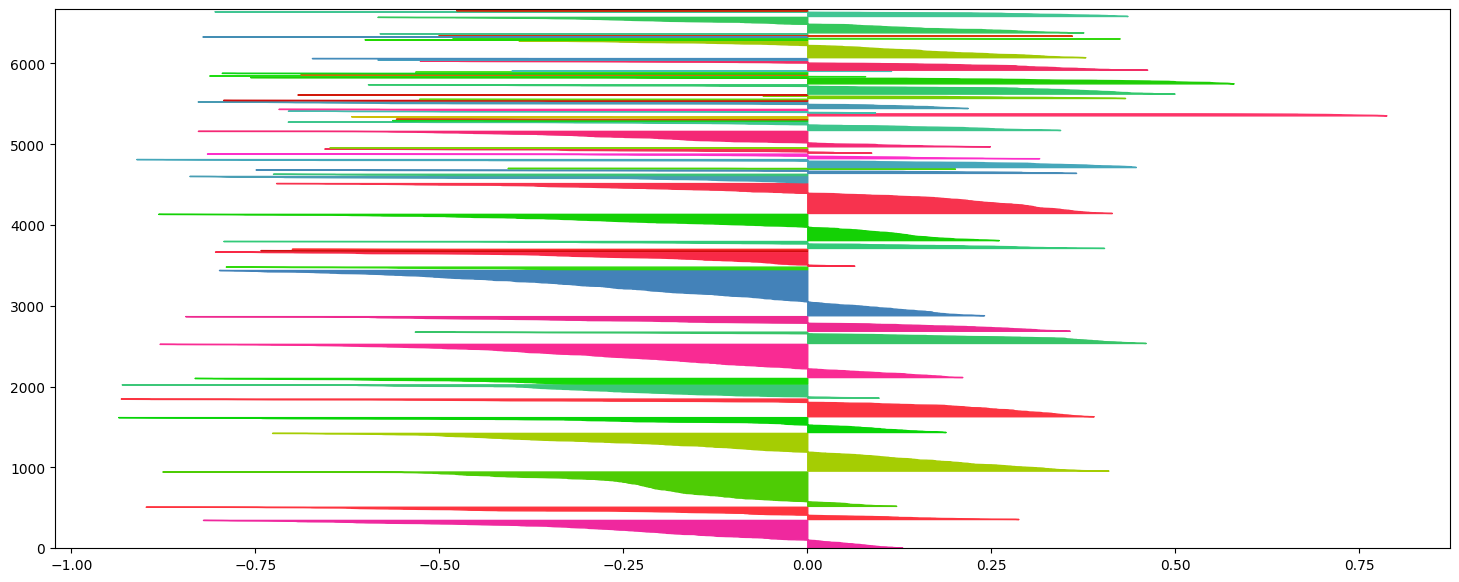

In [38]:
import matplotlib.pyplot as plt
import polars as pl
import matplotlib.pyplot as plt
import numpy as np


n_clusters = len(geocode_cluster_dataframe.df["cluster"].unique())
n_geocodes = len(geocode_distance_matrix.squareform())

# Create a subplot with 1 row and 2 columns
fig, ax1 = plt.subplots()
fig.set_size_inches(18, 7)
# The 1st subplot is the silhouette plot
# The silhouette coefficient can range from -1, 1 but in this example all
# lie within [-0.1, 1]
# ax1.set_xlim([-0.1, 1])
# The (n_clusters+1)*10 is for inserting blank space between silhouette
# plots of individual clusters, to demarcate them clearly.
ax1.set_ylim([0, n_geocodes + (n_clusters + 1) * 10])

y_lower = 10
for i, cluster in enumerate(geocode_cluster_dataframe.df["cluster"].unique()):
    ith_cluster_silhouette_values = (
        geocode_silhouette_score_dataframe.df.join(
            geocode_cluster_dataframe.df, on="geocode"
        )
        .filter(pl.col("cluster") == cluster)
        .sort("silhouette_score", descending=True)
    )["silhouette_score"]

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cluster_colors_dataframe.get_color_for_cluster(cluster)
    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
    )

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

## Build and plot GeoJSON feature collection

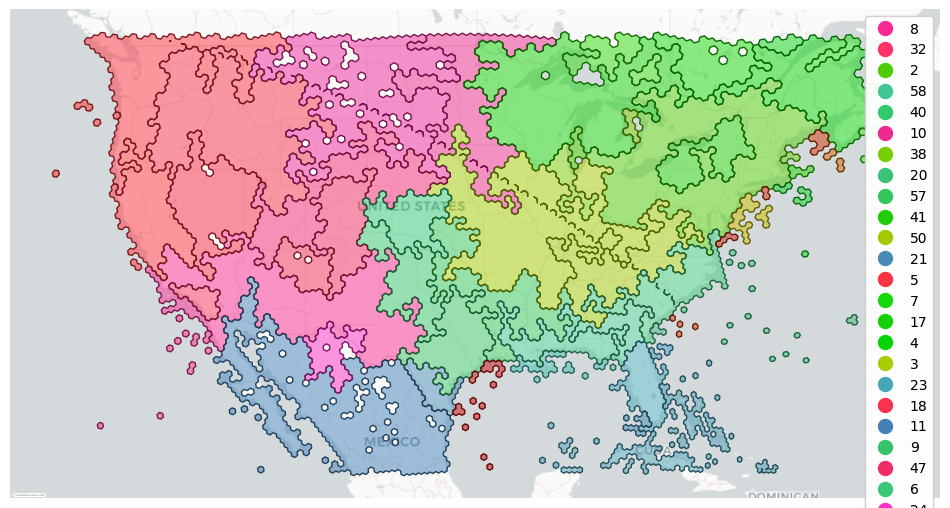

In [39]:
from src.geojson import build_geojson_feature_collection, write_geojson
from src.render import plot_clusters
from src import output
import matplotlib.pyplot as plt

# Set the figure size
plt.rcParams["figure.figsize"] = [12, 7]

feature_collection = build_geojson_feature_collection(
    cluster_boundary_dataframe,
    cluster_colors_dataframe,
)

write_geojson(feature_collection, output.get_geojson_path())
plot_clusters(feature_collection)

## Build and display HTML output

In [40]:
from src.html_output import prepare_full_report_data, render_html, write_html

report_data = prepare_full_report_data(
    cluster_colors_dataframe,
    cluster_significant_differences_dataframe,
    taxonomy_dataframe,
    feature_collection,
)
html_content = render_html("cluster_report.html", report_data)
write_html(html_content, "output.html")

## Dimensionality reduction plot

/Users/coreyf/dev/frewsxcv/citizen-science-ecoregions/.venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/coreyf/dev/frewsxcv/citizen-science-ecoregions/.venv/lib/python3.10/site-packages/umap/umap_.py:1865: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")
/Users/coreyf/dev/frewsxcv/citizen-science-ecoregions/.venv/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


<Axes: >

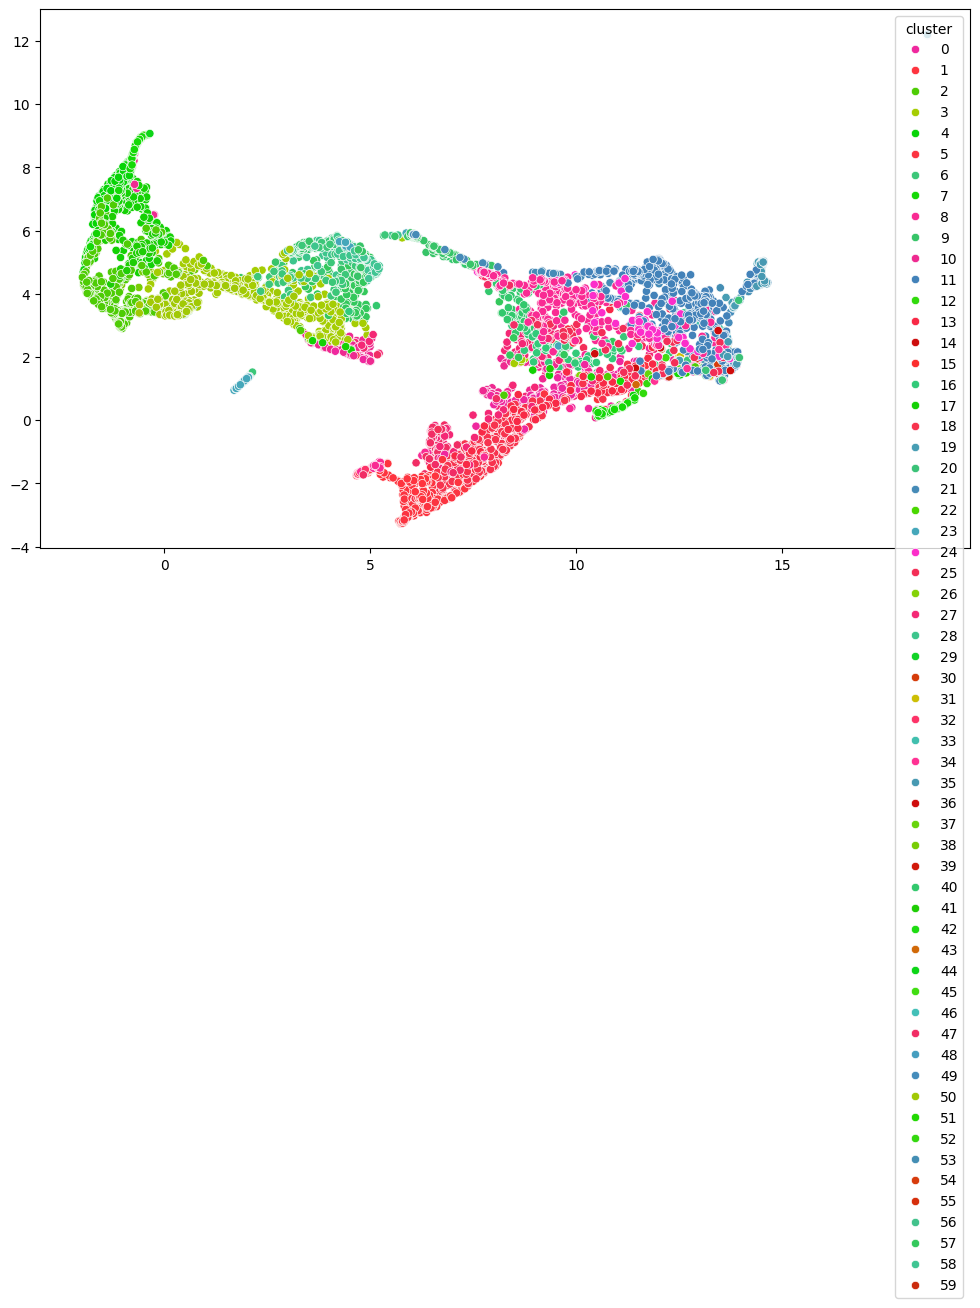

In [41]:
from src.plot.dimnesionality_reduction import create_dimensionality_reduction_plot

create_dimensionality_reduction_plot(
    geocode_distance_matrix,
    geocode_cluster_dataframe,
    cluster_colors_dataframe,
    method="umap",
)


## Clustermap visualization

In [42]:
import seaborn as sns
import polars as pl
from scipy.cluster.hierarchy import linkage


linkage_array = linkage(geocode_distance_matrix.condensed(), "ward")

ordered_geocodes = geocode_dataframe.df["geocode"].unique()


def min_max_normalize(series: pl.Series) -> pl.Series:
    return (series - series.min()) / (series.max() - series.min())


col_colors = []
for geocode in ordered_geocodes:
    cluster = geocode_cluster_dataframe.cluster_for_geocode(geocode)
    col_colors.append(cluster_colors_dataframe.get_color_for_cluster(cluster))

data = {}
for species, kingdom, taxonRank in (
    cluster_significant_differences_dataframe.df.select(
        "scientificName", "kingdom", "taxonRank"
    )
    .unique()
    .iter_rows()
):
    counts = []

    for geocode in ordered_geocodes:
        geocode_counts_species = (
            geocode_taxa_counts_dataframe.df.filter(
                pl.col("geocode") == geocode, pl.col("scientificName") == species
            )
            .get_column("count")
            .sum()
        )
        geocode_counts_all = (
            geocode_taxa_counts_dataframe.df.filter(pl.col("geocode") == geocode)
            .get_column("count")
            .sum()
        )
        geocode_average = geocode_counts_species / geocode_counts_all
        all_average = (
            cluster_taxa_statistics_dataframe.df.filter(
                pl.col("kingdom") == kingdom,
                pl.col("scientificName") == species,
                pl.col("cluster").is_null(),
                pl.col("taxonRank") == taxonRank,
            )
            .get_column("average")
            .item()
        )
        counts.append(geocode_average - all_average)
    counts = pl.Series(
        values=counts,
        name=species,
    )
    # counts = counts / counts.max()
    # counts = counts.pow(1 / 3)
    data[species] = min_max_normalize(counts)

ColumnNotFoundError: scientificName

Resolved plan until failure:

	---> FAILED HERE RESOLVING 'select' <---
DF ["cluster", "taxonId", "percentage_difference"]; PROJECT */3 COLUMNS

In [ ]:
dataframe = pl.DataFrame(data=data)
sns.clustermap(
    data=dataframe,
    col_cluster=False,
    row_cluster=True,
    row_linkage=linkage_array,
    row_colors=col_colors,
    xticklabels=dataframe.columns,
    yticklabels=False,
)